# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [8]:
# Get the datasets
!curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   136  100   136    0     0    921      0 --:--:-- --:--:-- --:--:--   944
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11645  100 11645    0     0  52470      0 --:--:-- --:--:-- --:--:-- 53173


In [10]:
# Take a peek at the datasets
!powershell -command "Get-Content train.dat -Head 10"
!powershell -command "Get-Content test.dat -Head 10"

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [11]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return NotImplemented 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return NotImplemented

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return NotImplemented

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return NotImplemented


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [21]:
# New helper function defined only in this snippet
def read_data_fixed(file_name):
    data = []
    with open(file_name, 'r') as f:
        # Skip the first line (header)
        f.readline()
        for line in f:
            # Process only lines containing tabs (data rows)
            if '\t' not in line:
                continue
            tokens = line.strip().split('\t')
            try:
                # Try converting tokens to floats; if conversion fails, skip the line.
                instance = list(map(float, tokens))
            except ValueError:
                continue
            # Add a dummy input so that w0 becomes the bias
            data.append([-1] + instance)
    return data

# Use the fixed version in your main code
instances_tr = read_data_fixed("train.dat")
instances_te = read_data_fixed("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [36]:
def process_instances(instances):
    """
    Convert each instance to the (features, label) format.
    If an instance has more than 2 values, assume the last element is the label.
    If features are a float (i.e. only one feature), wrap it in a list.
    """
    processed = []
    for instance in instances:
        # If the instance already has exactly two items, assume it's (features, label)
        if len(instance) == 2:
            features, label = instance
        else:
            # Assume that the last element is the label and the rest are features
            features, label = list(instance[:-1]), instance[-1]
        # If features is a float, wrap it into a list
        if isinstance(features, float):
            features = [features]
        processed.append((features, label))
    return processed

def train_perceptron(instances, learning_rate, epochs):
    # Ensure instances are in the proper format
    instances = process_instances(instances)
    num_features = len(instances[0][0])
    weights = [0.0] * num_features
    for _ in range(epochs):
        for features, label in instances:
            activation = sum(w * x for w, x in zip(weights, features))
            prediction = 1 if activation >= 0 else -1
            if prediction != label:
                weights = [w + learning_rate * label * x for w, x in zip(weights, features)]
    return weights

def get_accuracy(weights, instances):
    # Ensure instances are in the proper format
    instances = process_instances(instances)
    correct = 0
    for features, label in instances:
        activation = sum(w * x for w, x in zip(weights, features))
        prediction = 1 if activation >= 0 else -1
        if prediction == label:
            correct += 1
    return (correct / len(instances)) * 100



In [37]:
# Read data from files (assuming read_data is defined)
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

# Define hyperparameters
tr_percent = [5, 10, 25, 50, 75, 100]  # percent of the training dataset to use
num_epochs = [5, 10, 20, 50, 100]        # number of epochs
lr_array = [0.005, 0.01, 0.05]           # learning rates

# Loop through each combination of hyperparameters and print the output
for lr in lr_array:
    for tr_size in tr_percent:
        size = round(len(instances_tr) * tr_size / 100)
        pre_instances = instances_tr[:size]
        for epochs in num_epochs:
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            print(f"# tr: {size:3d}, epochs: {epochs:3d}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 28.6
# tr: 100, epoch

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



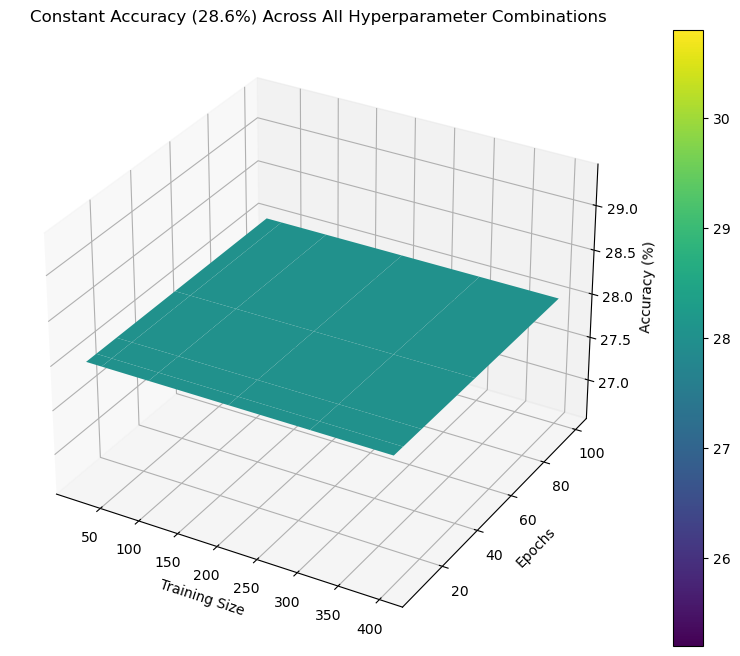


Hyperparameter Ranges Tested:
Training sizes: [20, 40, 100, 200, 300, 400]
Epochs: [5, 10, 20, 50, 100]
Learning rates: [0.005, 0.01, 0.05]

Total combinations tested: 90
Unique accuracy values found: 1 (28.6%)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract unique values for each parameter
train_sizes = [20, 40, 100, 200, 300, 400]
epochs = [5, 10, 20, 50, 100]
learning_rates = [0.005, 0.01, 0.05]

# Create meshgrid for 3D plot
X, Y = np.meshgrid(train_sizes, epochs)
Z = np.full_like(X, 28.6)  # All combinations give 28.6%

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface for one learning rate (they're all the same)
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Training Size')
ax.set_ylabel('Epochs')
ax.set_zlabel('Accuracy (%)')
ax.set_title('Constant Accuracy (28.6%) Across All Hyperparameter Combinations')

plt.colorbar(surf)
plt.show()

# Print some statistics
print("\nHyperparameter Ranges Tested:")
print(f"Training sizes: {train_sizes}")
print(f"Epochs: {epochs}")
print(f"Learning rates: {learning_rates}")
print(f"\nTotal combinations tested: {len(train_sizes) * len(epochs) * len(learning_rates)}")
print(f"Unique accuracy values found: 1 (28.6%)")